---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Daniel Meza Sanabria**
- Carné: **B74786**
- Grupo: **2**



---

---
# `P5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" (s) necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces, a continuación se realizará la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

El estado $i$ es el número de personas en el sistema. Es posible encontrar la probabilidad de que hayan más de 50 personas en el sistema como:

$$
P( \text{51 o más clientes en el sistema} ) = \sum_{i=51}^{\infty} \phi_i  = 1 - \sum_{i=0}^{50} \phi_i \leq 0.05
$$

Donde:
$$
\phi_i = \frac{(s\rho)^i}{i!}\phi_0 ~para~ i < s \\
\phi_i = \frac{s^s\rho^i}{s!}\phi_0 ~para~ i \geq s
$$
y:
$$
\phi_0 = \left[\sum_{k=0}^{s-1} \frac{(s\rho)^k}{k!} + \frac{(s\rho)^s}{s!(1-\rho)}\right]^{-1} \\
\rho = \frac{\lambda}{s\nu}
$$

En primer lugar, es de utilidad conocer la cantidad mínima de servidores para asegurar que el sistema pueda llegar a un estado estacionario, se debe satisfacer entonces la siguiente condición:
$$
\rho = \frac{\lambda}{s\nu} < 1
$$

Despejando la condición para el número de servidores s se tiene:
$$
s > \frac{\lambda}{\nu} = \frac{4}{0.25} = 16 \\
\Rightarrow \\
s > 16
$$

Así que para las especificaciones de solicitudes por minuto $\lambda$ y tiempo de servicio $\nu$ requeridas, se necesitan de al menos 16 servidores para que el sistema sea convergente. Esto, por supuesto, sin tomar todavía en consideración la condición de cantidad de personas máxima en fila (50), durante el 95% del tiempo de servicio total (8 horas).

Ahora bien, tomando una cantidad de servidores s = 18, se puede determinar la probabilidad de que hayan 51 o más clientes en el sistema, como se sigue a continuación:

$$
\phi_0 = \left[ \sum_{k=0}^{17} \frac{(16)^k}{k!} + \frac{16^{18}}{18!(1-\frac{16}{18})} \right]^{-1} \\
\iff \\
\phi_0 = \frac{10854718875}{135655395839044811}
$$

Así mismo, se sigue que:
$$
P( \text{51 o más clientes en el sistema} ) = 1 - \sum_{i=0}^{50} \phi_i = 1 - \phi_0\left[\sum_{i = 0}^{17} \frac{(16)^i}{i!} + \sum_{i = 18}^{50} \frac{(18)^{18}(\frac{16}{18})^i}{s!}\right] \\
\iff \\
P( \text{51 o más clientes en el sistema} ) = 1 - \left( \frac{10854718875}{135655395839044811} \right)\left( \frac{243912218487326398936715552537224914331261238003}{19732061951423599387970489519816486935875}\right)
$$

Y se obtiene que:
$$
P( \text{51 o más clientes en el sistema} ) = 0.0109 < 0.05
$$

Por lo que con 18 servidores es suficiente para cumplir con el requerimiento de mantener 50 o menos personas en fila por lo menos un 95% del tiempo total del servicio. A continuación se presentará un código que corrobora el resultado anterior y mostrará la gráfica de la simulación del sistema.

---

In [158]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt


def Pr_servidores(s, lamb, nu, maxfila, porcT, T):
    '''Un método que calcula la probabilidad
    de que con un determinado número de servidores,
    y los parámetros arribo y servicio, el número de
    personas en fila no sobrepase un determinado porcentaje
    del tiempo de servicio total y simula el comportamiento
    del número de clientes en el sistema a lo largo del tiempo
    de servicio total.

    :param s: Int con el número de servidores
    :param lamb: Tasa de llegada (clientes/min)
    :param nu: Tasa de servicio por servidor (clientes/min)
    :param maxfila: Cantidad máxima de clientes deseada en fila
    :param porcT: Porcentaje de tiempo con "maxfila" deseado
    :param T: Tiempo de servicio total (horas)
    '''

    # Se realiza el cambio de unidades para mayor "granularidad"
    lamb = lamb/60
    nu = nu/60
    T = T * 3600

    # Número de clientes
    N = int(lamb * T)

    # Parámetro rho
    rho = lamb/(s*nu)

    # Se comprueba que el sistema llegue a estado estacionario
    if rho >= 1:
        print('\t El sistema no es convergente')
        return None

    # Cálculo de phi_0
    k = 0
    phi0inv = pow(s*rho, s) / (math.factorial(s) * (1 - rho))
    while k < s:
        phi0inv += pow(s * rho, k) / (math.factorial(k))
        k += 1

    phi0 = 1 / phi0inv  # Valor final de phi_0

    # Cálculo de P(umbral de clientes o más)
    sumPhii = 0
    i = 0
    while i <= maxfila:
        if i < s:
            sumPhii += pow(s * rho, i) / math.factorial(i)
        if i >= s:
            sumPhii += pow(s, s) * pow(rho, i) / math.factorial(s)
        i += 1

    Prob = 1 - (phi0 * sumPhii)

    # Resultados
    print('''
        Con {} servidores, la probabilidad de que
        hayan {} o más clientes en fila durante
        las {} horas de servicio es de P = {:.2f}%. \n'''
          .format(s, maxfila + 1, T/3600, Prob*100))

    if Prob <= 1 - porcT/100:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.')

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale=1/lamb)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale=1/(s*nu))

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    t_atencion = []
    fin = []
    for n in range(s):
        inicio = t_llegadas[n]  # Primeras s llegadas
        fin.append(inicio + t_servicio[n])  # Primeras s salidas
        t_atencion.append(inicio)

    for i in range(s, N):
        inicio = np.max((t_llegadas[i], np.max(fin[s-i:i])))
        fin.append(inicio + t_servicio[i])
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = maxfila + 1

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c  # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P:
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('\t Parámetro lambda =', str(lamb*60))
    print('\t Parámetro nu =', str(nu*60))
    print('\t Parámetro s =', str(s))
    print('\t Tiempo con más de {} solicitudes en fila:'.format(P-2))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 1 - porcT/100:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.')
    print('\t Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 28800))
    plt.show()


Help on function Pr_servidores in module __main__:

Pr_servidores(s, lamb, nu, maxfila, porcT, T)
    Un método que calcula la probabilidad
    de que con un determinado número de servidores,
    y los parámetros arribo y servicio, el número de
    personas en fila no sobrepase un determinado porcentaje
    del tiempo de servicio total y simula el comportamiento
    del número de clientes en el sistema a lo largo del tiempo
    de servicio total.
    
    :param s: Int con el número de servidores
    :param lamb: Tasa de llegada (clientes/min)
    :param nu: Tasa de servicio por servidor (clientes/min)
    :param maxfila: Cantidad máxima de clientes deseada en fila
    :param porcT: Porcentaje de tiempo con "maxfila" deseado
    :param T: Tiempo de servicio total (horas)


        Con 17 servidores, la probabilidad de que
        hayan 51 o más clientes en fila durante
        las 8.0 horas de servicio es de P = 9.38%. 

	 No cumple con la especificación.
	 Parámetro lambda = 4.0
	 Par

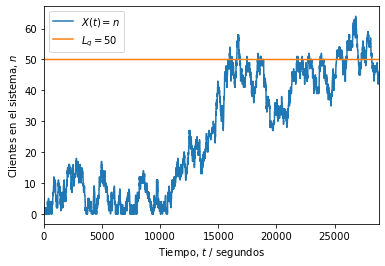


        Con 18 servidores, la probabilidad de que
        hayan 51 o más clientes en fila durante
        las 8.0 horas de servicio es de P = 1.09%. 

	 Sí cumple con la especificación.
	 Parámetro lambda = 4.0
	 Parámetro nu = 0.25
	 Parámetro s = 18
	 Tiempo con más de 49 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
	 Simulación es equivalente a 8.27 horas.


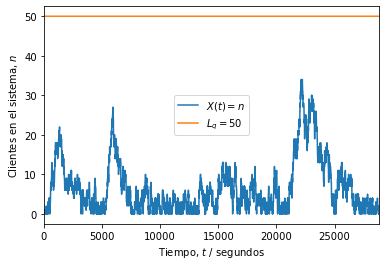

In [191]:
# Se muestra información sobre la función
help(Pr_servidores)

# Se realizan simulaciones para 17 y 18 servidores
Pr_servidores(17, 4, 0.25, 50, 95, 8)
Pr_servidores(18, 4, 0.25, 50, 95, 8)


---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---